<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

ガウス分布こと正規分布は、以下の式で定義される最も基本的かつ重要な確率分布です。

$$
\begin{align}
p(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{ -\frac{(x - \mu)^2 }{ 2 \sigma^2 } \right\}
\end{align}
$$

$x$は確率変数、$\mu$は平均、$\sigma^2$は分散です。


上で示した単変量の正規分布の扱いは簡単だけど、多変量になった途端扱いが大変だなぁと思ったので取り扱いを今回はまとめます。

---

## 多変量ガウス分布の定義

$n$次元の確率変数ベクトル${\boldsymbol x}=(x_1, x_2, \ldots , x_n)$が平均${\boldsymbol \mu}$、共分散行列${\boldsymbol \Sigma}$の多変量ガウス分布に従うとき、その確率密度関数は

$$
\begin{align}
p({\boldsymbol x} | {\boldsymbol \mu}, {\boldsymbol \Sigma})= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det \Sigma}} \exp \left\{ -\frac{1}{2} \left({\boldsymbol x}- {\boldsymbol \mu} \right)^{\mathrm T} \Sigma^{-1} \left({\boldsymbol x}- {\boldsymbol \mu} \right) \right\}
\end{align}
$$

で定義される。

---

## 多変量ガウス分布を理解するための数学の準備
多変量ガウス分布をすっきり理解するために、いくつか数学の準備をしておきましょう。

#### 単変数のガウス積分

$a$を正の定数として、変数$x$に関して
$$
\begin{align}
I = \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x
\end{align}
$$
で書かれる積分をガウス積分といいます。

これが
$$
\begin{align}
 \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x = \sqrt{\frac{\pi}{a}}
\end{align}
$$

となることを確認します。

$$
\begin{align}
I^2 &= \left( \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x \right)^2  \\
&=\left( \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x \right)\left( \int_{-\infty}^{\infty} e^{-ay^2} \mathrm{d}y \right) \\
&=  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  e^{-ax^2-ay^2} \mathrm{d}x \mathrm{d}y
\end{align}
$$

積分順序の交換はフビニの定理を用いました。ここで、

$$
\begin{align}
x &= r \cos \theta \\
y &= r \sin \theta
\end{align}
$$

と置くと、ヤコビアンは

$$
\begin{align}
\left|
    \begin{array}{cc}
      \frac{\mathrm{d}x}{\mathrm{d}r} & \frac{\mathrm{d}x}{\mathrm{d}\theta} \\
      \frac{\mathrm{d}y}{\mathrm{d}r} & \frac{\mathrm{d}y}{\mathrm{d}\theta} \\
    \end{array}
  \right| 
= \left|
    \begin{array}{cc}
      \cos \theta & r \sin \theta \\
      \sin \theta & r \cos \theta \\
    \end{array}
  \right| 
= r \cos^2 \theta + r \sin^2 \theta = r
\end{align}
$$

となるので、

$$
\begin{align}
\int_{0}^{\infty} \int_{0}^{2\pi}  e^{-ar^2} \cdot r \mathrm{d}\theta \mathrm{d}r &= 2\pi \int_{0}^{\infty} re^{-ar^2}  \mathrm{d}r \\
&= 2\pi \left[\frac{e^{-ar^2}}{-2a} \right]\_{0}^{\infty} = 2\pi \left(0 - \frac{1}{-2a} \right) = \frac{\pi}{a} \\
I &= \sqrt{\frac{\pi}{a}}
\end{align}
$$

#### 二次形式の平方完成

$$
\begin{align}
-&\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T}{\boldsymbol x}  \\
&= -\frac{1}{2} \left(A^{1/2} {\boldsymbol x} - A^{1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2} {\boldsymbol x} - A^{1/2}{\boldsymbol b} \right) + \frac{1}{2} \left( {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b}  \right)
\end{align}
$$




#### 多変数のガウス積分
${\boldsymbol A}$を$n \times n$の正則な対称行列、${\boldsymbol b}$を$n$次元の定数のベクトルとして、$n$次元の変数ベクトル${\boldsymbol x}$に関して、

$$
\begin{align}
I &= \int \exp\left\{ -\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T} {\boldsymbol x} \right\} \mathrm{d}{\boldsymbol x}
\end{align}
$$

の形の積分を、多変数のガウス積分と呼びます。これが

$$
\begin{align}
I &= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det A}} \exp \left\{ -\frac{1}{2} {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b} \right\}
\end{align}
$$

となることを確認します。2次形式の平方完成より

$$
\begin{align}
I &= \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right) + \frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} {\mathrm d}{\boldsymbol x} \\
&= \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right)  \right\} {\mathrm d}{\boldsymbol x}
\end{align}
$$

ここで、

$$
\begin{align}
{\boldsymbol y} &= A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}
\end{align}
$$

とおくと、

$$
\begin{align}
{\boldsymbol x} &= A^{1/2}{\boldsymbol y} + A^{-1}{\boldsymbol b}
\end{align}
$$

なので、この時のヤコビアンは

$$
\begin{align}
\frac{\partial {\boldsymbol x}}{\partial {\boldsymbol y}} &= \det A^{-1/2} = \left(\det A \right)^{-1/2}
\end{align}
$$

より、

$$
\begin{align}
I & = \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \cdot \left(\det A \right)^{-1/2}  \right\} {\mathrm d}{\boldsymbol y} \\
&= \left(\det A \right)^{-1/2} \cdot \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\}  \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \right\} {\mathrm d}{\boldsymbol y} \\
&= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det A}} \exp \left\{ -\frac{1}{2} {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b} \right\}
\end{align}
$$

最後の式変形には、1変数のガウス積分を用いました。



#### ブロック行列
ブロック行列の積は、通常の行列と同様に計算できます。しかしブロック行列の逆行列を求めようとすると一工夫必要です。
覚えておくと便利なので、ついでに行列式を得てから逆行列を求めます。

###### 行列式
$A, B, C, D$をそれぞれブロック行列を構成する要素の行列とするとき、

$$
\begin{align}
\left(
    \begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
  \right) 
= \left(
    \begin{array}{cc}
      I & O \\
      CA^{-1} & I \\
    \end{array}
  \right) \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
  \right) \left(
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
  \right) 
\end{align}
$$

のように分解できます。導出は以下の通りです。

__【導出】__  
まず、左辺から$B$を消去します。

$$
\begin{align}
\left(
    \begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
\right) &= \left(
    \begin{array}{cc}
      A & -B+B \\
      C & D-CA^{-1}B \\
    \end{array}
\right) \\
&= \left(
    \begin{array}{cc}
      A & O \\
      C & D-CA^{-1}B \\
    \end{array}
\right)
\end{align}
$$

次に$C$を消去します。

$$
\begin{align}
\left(
    \begin{array}{cc}
      I & O \\
      -CA^{-1}I & I \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      A & O \\
      C & D-CA^{-1}B \\
    \end{array}
\right) &= \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right)
\end{align}
$$

以上より、

$$
\begin{align}
\left(
    \begin{array}{cc}
      I & O \\
      -CA^{-1} & I \\
    \end{array}
\right) &\left(
    \begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      I & -A^{-1}B \\
      O & I \\
    \end{array}
\right) = \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right) \\
\left(
    \begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right) &= \left(
    \begin{array}{cc}
      I & O \\
      -CA^{-1} & I \\
    \end{array}
\right)^{-1} \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      I & -A^{-1}B \\
      O & I \\
    \end{array}
\right)^{-1} \\
&= \left(
    \begin{array}{cc}
      I & O \\
      CA^{-1} & I \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
\right) 
\end{align}
$$

ここで、$\det |AB| = \det |A||B|$より、

$$
\begin{align}
\left|
    \begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
  \right|
&= \left|
    \begin{array}{cc}
      I & O \\
      CA^{-1} & I \\
    \end{array}
  \right| \left|
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
  \right| \left|
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
  \right| \\
&= \left|
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right| \\
&= \left|A\left(D-CA^{-1}B \right) \right| = \det A \det \left(D-CA^{-1}B \right)
\end{align}
$$

とブロック行列の行列式が求まりました。

###### 逆行列
では、少し寄り道をしたところでブロック行列を分解した式から逆行列を求めていきます。

$$
\begin{align}
\left(\begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right)^{-1} &= \left(\left(
    \begin{array}{cc}
      I & O \\
      CA^{-1} & I \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right) \left(
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
\right)\right)^{-1}  \\
&= \left(
    \begin{array}{cc}
      I & A^{-1}B \\
      O & I \\
    \end{array}
\right)^{-1}
    \left(
    \begin{array}{cc}
      A & O \\
      O & D-CA^{-1}B \\
    \end{array}
\right)^{-1}
\left(
    \begin{array}{cc}
      I & O \\
      CA^{-1} & I \\
    \end{array}
\right)^{-1} 
\end{align}
$$

表記が大変なので、$S=D-CA^{-1}B$として、

$$
\begin{align}
\left(\begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right)^{-1} &= \left(
    \begin{array}{cc}
      I & -A^{-1}B \\
      O & I \\
    \end{array}
\right)
    \left(
    \begin{array}{cc}
      A^{-1} & O \\
      O & S^{-1} \\
    \end{array}
\right)
\left(
    \begin{array}{cc}
      I & O \\
      -CA^{-1} & I \\
    \end{array}
\right) \\
&=  \left(
    \begin{array}{cc}
      A^{-1} & -A^{-1}BS^{-1} \\
      O & S^{-1} \\
    \end{array}
\right)
\left(
    \begin{array}{cc}
      I & O \\
      -CA^{-1} & I \\
    \end{array}
\right) \\
&= \left(
    \begin{array}{cc}
      A^{-1} + A^{-1}BS^{-1}CA^{-1} & -A^{-1}BS^{-1} \\
      -S^{-1}CA^{-1} & S^{-1} \\
    \end{array}
\right) 
\end{align}
$$

さらに、$D$が正則なら、逆行列の補助定理

$$
\begin{align}
A^{-1} + A^{-1}BS^{-1}CA^{-1} = \left(A-BD^{-1}C \right)^{-1}
\end{align}
$$

より、

$$
\begin{align}
\left(\begin{array}{cc}
      A & B \\
      C & D \\
    \end{array}
\right)^{-1} 
&= \left(
    \begin{array}{cc}
      A^{-1} + A^{-1}BS^{-1}CA^{-1} & -A^{-1}BS^{-1} \\
      -S^{-1}CA^{-1} & S^{-1} \\
    \end{array}
\right)  \\
&= \left(
    \begin{array}{cc}
      \left(A - BD^{-1}C \right) & -A^{-1}B\left(D-CA^{-1}B\right)^{-1} \\
      -\left(D-CA^{-1}B\right)^{-1}CA^{-1} & \left(D-CA^{-1}B\right)^{-1} \\
    \end{array}
\right) 
\end{align}
$$

と書けます。ちなみに多変量ガウス分布を考える場合は、このブロック行列は分散共分散行列に対応するため半正定値です。そのため$D$は正則になります。

$$
\begin{align}
I &= \int \exp \left\{-\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T} {\boldsymbol x} \right\} {\mathrm d}{\boldsymbol x}
\end{align}
$$

2次形式の平方完成より

$$
\begin{align}
I &= \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right) + \frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} {\mathrm d}{\boldsymbol x} \\
&= \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right)  \right\} {\mathrm d}{\boldsymbol x}
\end{align}
$$

ここで、

$$
\begin{align}
{\boldsymbol y} &= A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}
\end{align}
$$

とおくと、

$$
\begin{align}
{\boldsymbol x} &= A^{1/2}{\boldsymbol y} + A^{-1}{\boldsymbol b}
\end{align}
$$

なので、この時のヤコビアンは

$$
\begin{align}
\frac{\partial {\boldsymbol x}}{\partial {\boldsymbol y}} &= \det A^{-1/2} = \left(\det A \right)^{-1/2}
\end{align}
$$

より、

$$
\begin{align}
I & = \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \cdot \left(\det A \right)^{-1/2}  \right\} {\mathrm d}{\boldsymbol y} \\
&= \left(\det A \right)^{-1/2} \cdot \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\}  \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \right\} {\mathrm d}{\boldsymbol y} \\
&= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det A}} \exp \left\{ -\frac{1}{2} {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b} \right\}
\end{align}
$$

最後の式変形には、1変数のガウス積分を用いました。

---


数学の準備が終わったので多変量ガウス分布をいじっていきましょう。

## 多変量正規分布の正規化定数の導出

多変量ガウス分布の正規化定数は、上式を$\Sigma=A$、${\boldsymbol b} = 0$と置くことにより計算できます。

$$
\begin{align}
I & = \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det \Sigma}} 
\end{align}
$$

## 多変量ガウス分布の周辺化

$$
\begin{align}
p({\boldsymbol x}_{1})= \int p \left({\boldsymbol x}_{1}, {\boldsymbol x}_{2} \right) {\mathrm d}{\boldsymbol x}_{2} = {\mathcal N} \left({\boldsymbol x}_{1}, \Sigma_{1} \right)
\end{align}
$$

を確かめます。ここで、${\boldsymbol x}_{1}, {\boldsymbol x}_{2}$は、

$$
\begin{align}
\left(\begin{array}{c}
      {\boldsymbol x}_{1} \\
      {\boldsymbol x}_{2} \\
    \end{array}
\right) 
&\sim {\mathcal N}  \left( \left(
    \begin{array}{c}
      {\boldsymbol 0} \\
      {\boldsymbol 0} \\
    \end{array}
\right),  \left( \begin{array}{cc}
      \Sigma_{11} & \Sigma_{12} \\
      \Sigma_{21} & \Sigma_{22} \\
    \end{array}  \right) \right)
\end{align}
$$

だとします。データを適当に2分割して表示しただけですね。また、

$$
\begin{align}
\Lambda = \left( \begin{array}{cc}
      \Lambda_{11} & \Lambda_{12} \\
      \Lambda_{21} & \Lambda_{22} \\
    \end{array}
 \right) &=  \left( \begin{array}{cc}
      \Sigma_{11} & \Sigma_{12} \\
      \Sigma_{21} & \Sigma_{22} \\
    \end{array}  \right)^{-1}
\end{align}
$$

とすれば、

$$
\begin{align}
p \left(\begin{array}{c}
      {\boldsymbol x}_{1} \\
      {\boldsymbol x}_{2} \\
    \end{array}
\right) &\propto \exp \left\{ - \frac{1}{2} \left(
    \begin{array}{c}
      {\boldsymbol x_{1}} \\
      {\boldsymbol x_{2}} \\
    \end{array}
\right)^{\mathrm T} \left( \begin{array}{cc}
      \Lambda_{11} & \Lambda_{12} \\
      \Lambda_{21} & \Lambda_{22} \\
    \end{array} 
 \right) \left(
    \begin{array}{c}
      {\boldsymbol x_{1}} \\
      {\boldsymbol x_{2}} \\
    \end{array}
\right)
\right\}
\end{align}
$$

を確かめれば十分です。2分割以上の場合でも同様に示せます。


$\Lambda$は対称行列なので、$\Lambda = \Lambda^{\mathrm T}$と、2次形式の平方完成を使って

$$
\begin{align}
-\frac{1}{2} \left(
    \begin{array}{c}
      {\boldsymbol x_{1}} \\
      {\boldsymbol x_{2}} \\
    \end{array}
\right)^{\mathrm T} \left( \begin{array}{cc}
      \Lambda_{11} & \Lambda_{12} \\
      \Lambda_{21} & \Lambda_{22} \\
    \end{array} 
 \right) \left(
    \begin{array}{c}
      {\boldsymbol x_{1}} \\
      {\boldsymbol x_{2}} \\
    \end{array}
\right) &= {\boldsymbol x_{1}}^{\mathrm T} \Lambda_{11}  {\boldsymbol x_{1}} + {\boldsymbol x_{1}}^{\mathrm T} \Lambda_{12}  {\boldsymbol x_{1}} + {\boldsymbol x_{2}}^{\mathrm T} \Lambda_{21}  {\boldsymbol x_{1}} + {\boldsymbol x_{2}}^{\mathrm T} \Lambda_{22}  {\boldsymbol x_{2}} \\
&=  {\boldsymbol x_{1}}^{\mathrm T} \Lambda_{11}  {\boldsymbol x_{1}} + 2 {\boldsymbol x_{1}}^{\mathrm T} \Lambda_{21}  {\boldsymbol x_{2}} + {\boldsymbol x_{2}}^{\mathrm T} \Lambda_{22}  {\boldsymbol x_{2}} \\
&= \left({\boldsymbol x}_2 + \Lambda_{22}^{-1}\Lambda_{21}{\boldsymbol x}_{1} \right)^{\mathrm T} \Lambda_{22} \left({\boldsymbol x}_2 + \Lambda_{22}^{-1}\Lambda_{21}{\boldsymbol x}_{1} \right) - {\boldsymbol x}_{1}^{\mathrm T}  \Lambda_{21}^{\mathrm T}\Lambda_{22}^{-1}\Lambda_{21}{\boldsymbol x}_{1} + {\boldsymbol x}_{1}^{\mathrm T}\Lambda_{11}{\boldsymbol x}_{1} 
\end{align}
$$

ここで第一項の二次形式は$x_{2}$で積分されたとき、多変数のガウス積分を用いれば、$\Lambda_{22}$に依存する定数項になります。以上より、

$$
\begin{align}
p({\boldsymbol x}_{1}) &= \int p \left({\boldsymbol x}_{1}, {\boldsymbol x}_{2} \right) {\mathrm d}{\boldsymbol x}_{2} \\
&= \exp \left\{ - \frac{1}{2} \left( {\boldsymbol x}_{1}^{\mathrm T}  \Lambda_{21}^{\mathrm T}\Lambda_{22}^{-1}\Lambda_{21}{\boldsymbol x}_{1} + {\boldsymbol x}_{1}^{\mathrm T}\Lambda_{11}{\boldsymbol x}_{1} \right) \right\} \exp \left( const. \right) \\
&\propto \exp \left\{ - \frac{1}{2} {\boldsymbol x}_{1}^{\mathrm T} \left( \Lambda_{11} - \Lambda_{21}^{\mathrm T}\Lambda_{22}^{-1}\Lambda_{21} \right) {\boldsymbol x}_{1} \right\} 
\end{align}
$$

$$
\begin{align}
p({\boldsymbol x}_{1}) &= {\mathcal N} \left({\boldsymbol 0}, \left( \Lambda_{11} - \Lambda_{21}^{\mathrm T}\Lambda_{22}^{-1}\Lambda_{21} \right)^{-1} \right)
\end{align}
$$

よって、

$$
\begin{align}
\left( \Lambda_{11} - \Lambda_{21}^{\mathrm T}\Lambda_{22}^{-1}\Lambda_{21} \right)^{-1} &= \Sigma_{11}
\end{align}
$$

となることがわかります。 ちょうど${\boldsymbol x_2}$に関するものが消えていることがわかります。

## 条件付き多変量ガウス分布

$$
\begin{align}
p\left({\boldsymbol x}_{2} | {\boldsymbol x}_{1} \right) &\propto  p\left({\boldsymbol x}_{1}, {\boldsymbol x}_{2} \right) \\
&\propto \exp \left(-\frac{1}{2} \left\{ \left(\begin{array}{l}
    {\boldsymbol x}_{1}-{\boldsymbol \mu}_{1} \\ 
    {\boldsymbol x}_{2}-{\boldsymbol \mu}_{2} \\
\end{array}\right)^{\mathrm T}
\left(\begin{array}{ll}
    {\boldsymbol \Lambda}_{11} & {\boldsymbol \Lambda}_{12} \\ 
    {\boldsymbol \Lambda}_{21} & {\boldsymbol \Lambda}_{22} \\
\end{array} \right)
\left(\begin{array}{l}
    {\boldsymbol x}_{1}- {\boldsymbol \mu}_{1} \\
    {\boldsymbol x}_{2}- {\boldsymbol \mu}_{2} \\
\end{array}\right)
\right\}\right) \\
&= \exp \left(-\frac{1}{2}\left\{\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)^{\mathrm T} {\boldsymbol \Lambda}_{11}\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)+\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)^{\mathrm T} {\boldsymbol \Lambda}_{12}\left({\boldsymbol x}_{2}-{\boldsymbol \mu}_{2}\right)+
\left({\boldsymbol x}_{2}-{\boldsymbol \mu}_{2}\right)^{\mathrm T} {\boldsymbol \Lambda}_{21}\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)+\left({\boldsymbol x}_{2}-{\boldsymbol \mu}_{2}\right)^{\mathrm T} {\boldsymbol \Lambda}_{22}\left({\boldsymbol x}_{2}-{\boldsymbol \mu}_{2}\right)\right\} \right) \\
&\propto \exp \left[- \frac{1}{2} \left\{ \left({\boldsymbol x}_{2} - {\boldsymbol \mu}_{2} \right)^{\mathrm T} \Lambda_{22} \left({\boldsymbol x}_{2} - {\boldsymbol \mu}_{2} \right) + 2 \left({\boldsymbol x}_{1} - {\boldsymbol \mu}_{1} \right)^{\mathrm T} \Lambda_{21} \left({\boldsymbol x}_{2} - {\boldsymbol \mu}_{2} \right) \right\} \right] \\
&\propto \exp\left[-\frac{1}{2} \left\{{\boldsymbol x}_{2}^{\mathrm T} \Lambda_{22} {\boldsymbol x}_{2} - {\boldsymbol x}_{2}^{\mathrm T} \Lambda_{22} {\boldsymbol \mu}_{2} - {\boldsymbol \mu}_{2}^{\mathrm T} \Lambda_{22} {\boldsymbol x}_{2} + {\boldsymbol \mu}_{2}^{\mathrm T} \Lambda_{22} {\boldsymbol \mu}_{2} + 2\left({\boldsymbol x}_{1} - \mu_{1}\right)^{\mathrm T} \Lambda_{21} {\boldsymbol x}_{2} -2\left({\boldsymbol x}_{1} - \mu_{1}\right)^{\mathrm T} \Lambda_{21} {\boldsymbol \mu}_{2} \right\} \right]
\end{align}
$$

$\boldsymbol x_2$に関する項だけ残せば、

$$
\begin{align}
&\propto \exp \left(-\frac{1}{2}\left\{{\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol x}_{2}-{\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol \mu}_{2}-{\boldsymbol \mu}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol x}_{2}+2\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)^{\mathrm T} {\boldsymbol \Lambda}_{21} {\boldsymbol x}_{2}\right\}\right) \\
&= \exp \left[-\frac{1}{2} \left\{{\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol x}_{2} -2{\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol \mu}_{2} + 2{\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{21} \left({\boldsymbol x}_{1} - \mu_{1}\right) \right\} \right] \\
&= \exp \left[-\frac{1}{2} \left\{ {\boldsymbol x}_{2}^{\mathrm T} {\boldsymbol \Lambda}_{22} {\boldsymbol x}_{2} -2{\boldsymbol x}_{2}^{\mathrm T} \left( {\boldsymbol \Lambda}_{22} {\boldsymbol \mu}_{2} - {\boldsymbol \Lambda}_{21} \left({\boldsymbol x}_{1} - \mu_{1}\right)\right) \right\} \right]
\end{align}
$$

これを${\boldsymbol x_{2}}$について平方完成すれば

$$
\begin{align}
\propto \exp \left(-\frac{1}{2}\left\{\left({\boldsymbol x}_{2}-{\boldsymbol \Lambda}_{22}^{-1}\left({\boldsymbol \Lambda}_{22} {\boldsymbol \mu}_{2}-{\boldsymbol \Lambda}_{21}\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)\right)\right)^{T} {\boldsymbol \Lambda}_{22}\left({\boldsymbol x}_{2}-\cdots \right)\right\}\right)
\end{align}
$$

以上より、

$$
\begin{align}
p\left({\boldsymbol x}_{2} | {\boldsymbol x}_{1}\right) &\sim \mathcal{N} \left(\Lambda_{22}^{-1}\left({\boldsymbol \Lambda}_{22} {\boldsymbol \mu}_{2}-{\boldsymbol \Lambda}_{21} \left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right)\right), {\boldsymbol \Lambda}_{22}^{-1}\right) \\ &=\mathcal{N}\left({\boldsymbol \mu}_{2}-{\boldsymbol \Lambda}_{22}^{-1} {\boldsymbol \Lambda}_{21}\left({\boldsymbol x}_{1}-{\boldsymbol \mu}_{1}\right), {\boldsymbol \Lambda}_{22}^{-1}\right)
\end{align}
$$

ここで、[ブロック行列の逆行列](#ブロック行列)を用いれば、

$$
\begin{align}
p\left({\boldsymbol x}_{2} | {\boldsymbol x}_{1}\right) &\sim \mathcal{N} \left( \boldsymbol{x}_{2} - S\left(-S^{-1} \Sigma_{21} \Sigma_{11}^{-1} \right) \left(\boldsymbol{x}_{1} - \boldsymbol{\mu} \right) , S \right) \\ 
&= \mathcal{N} \left( \boldsymbol{\mu}_{2} + \Sigma_{21} \Sigma_{11}^{-1} \left( \boldsymbol{x}_{1} - \boldsymbol{\mu}_{1} \right), \Sigma_{22} - \Sigma_{21} \Sigma_{11}^{-1} \Sigma_{21} \right)
\end{align}
$$

となります。

平均の方は$\Sigma_{11}^{-1} \left( \boldsymbol{x}_{1} - \boldsymbol{\mu}_{1} \right)$で標準化してから、$\Sigma_{21}$で線形変換していると考えるとしっくりきます。

## 実践編
式ばっかり弄っていても実感がわかないので、シミュレーションしてみます。

#### 単変量ガウス分布からのサンプリング
box-muller法によるサンプリング

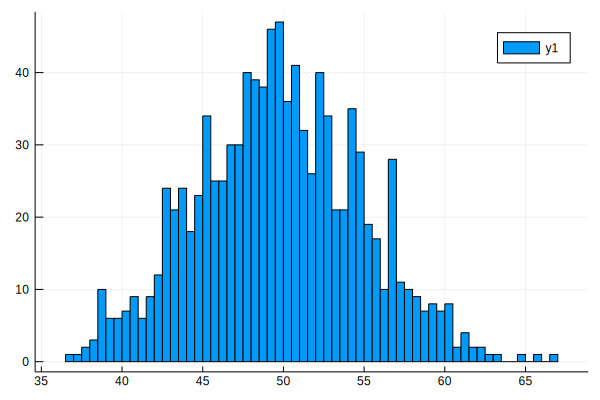

In [2]:
using Random
using Plots

function box_muller(μ::T, σ::T, n::Integer) where {T<:Real}
    sample = zeros(T, n)
    for i=1:n
        r₁ = rand()
        r₂ = rand()
        x = sqrt(-2log(r₁)) * sin(2π*r₂)
        sample[i] = μ + σ*x
    end
    return sample
end

μ = 50.
σ = 5.
n = 1000

sample = box_muller(μ, σ, n)

histogram(sample, bins=100)

#### 多変量ガウス分布からのサンプリング
1. 分散共分散行列$\Sigma$をコレスキー分解
$$
\begin{align}
\Sigma &= \mathbf{LL}^{\mathrm T}
\end{align}
$$
1. それぞれの要素が独立に標準正規分布に従う$\boldsymbol{x} = (x_1, \ldots , x_n)$をサンプリングし、$\boldsymbol{y}=\mathbf{L}\boldsymbol{x}$と変換する

In [6]:
using LinearAlgebra
using Random
using Plots

function mvnorm(μ::T, L::AbstractMatrix{T}, n::Integer) where {T<:Real}
    y = zeros(Float64, (size(L)[1], n))
    for i=1:n
        x = randn(size(L)[1])
        y[:,i] = μ .+ L*x
    end
    return y
end

M = rand(MersenneTwister(20191125), Float64, (2,2))
L = LowerTriangular(M)

sample = mvnorm(0., L, 10000)

scatter(sample[1,:], sample[2,:])

# 参考
ガウス過程と機械学習

[Wikipedia: 多変量正規分布](https://ja.wikipedia.org/wiki/%E5%A4%9A%E5%A4%89%E9%87%8F%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83:title)

[https://mathtrain.jp/gauss:title]

[https://mathtrain.jp/multi_gauss-2:title]

ヤコビアンに関してはヨビノリたくみさんのyoutube動画がお勧め。
<iframe width="560" height="315" src="https://www.youtube.com/embed/Iu8jVdkiKTc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>